Q24: How clear is it that students' feedback on the course is acted on?
Q25: How well does the students' union (association or guild) represent students' academic interests?
Q14: How often does feedback help you to improve your work?
Q17: How well organised is your course?
Q10: How clear were the marking criteria used to assess your work? 
Q18: How well were any changes to teaching on your course communicated?
Q08: To what extent does your course have the right balance of directed and independent study?
Q23: To what extent are students' opinions about the course valued by staff?
Q26: How well communicated was information about your university/college's mental wellbeing support services?
Q28: Overall, I am satisfied with the quality of the course.
Q13: How often have you received assessment feedback on time?
Q02: How often do teaching staff make the subject engaging?
Q11: How fair has the marking and assessment been on your course? 
Q12: How well have assessments allowed you to demonstr

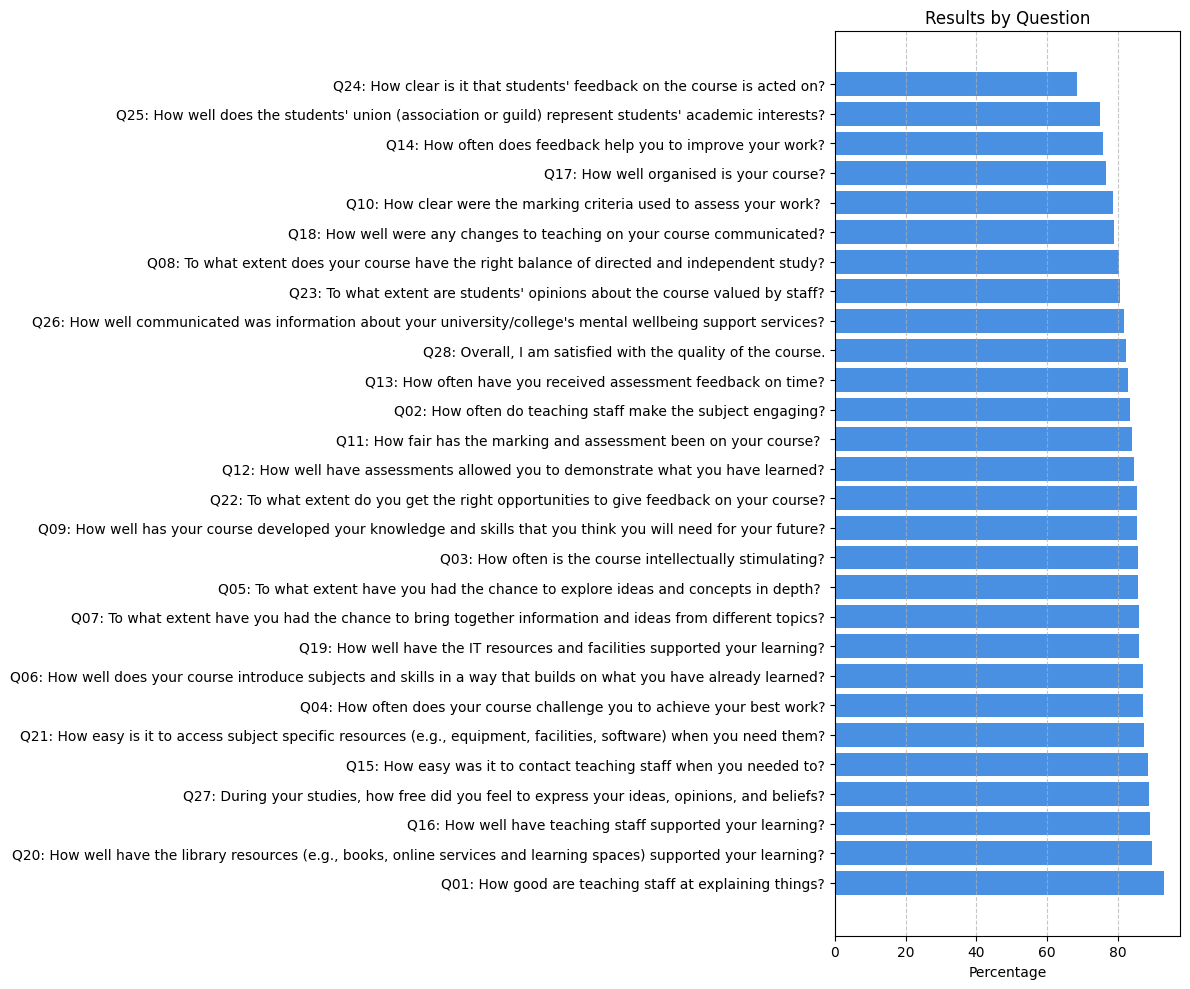

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---
questionToPlot = [] 

answerVaules = []
# Get the list of subjects
totalCha1 = df["cah1_subject"].unique().tolist()

top_10 = (df.groupby('question', as_index=False)
            .agg(mean_agree_pct=('agree_pct', 'mean'))
            .sort_values('mean_agree_pct', ascending=True)
)

    # 3. APPEND to the list
for index, row in top_10.iterrows():
    
                    # The subject name
     
        questionToPlot.append(row['question'])              
        answerVaules.append(row['mean_agree_pct'])   



for x in range(len(top_10)):
    print(questionToPlot[x]) 
# -----------------------------

# --- THE PLOTTING CODE (FIXED) ---



fig, ax = plt.subplots(figsize=(12, 10))

# Use barh for horizontal bars
ax.barh(questionToPlot, answerVaules, color='#4a90e2')

ax.set_xlabel("Percentage")
ax.set_title("Results by Question")
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on X axis only
ax.invert_yaxis() # Top question at the top

plt.tight_layout()
plt.show()




plt.show()

Q24: How clear is it that students' feedback on the course is acted on?
Q14: How often does feedback help you to improve your work?
Q25: How well does the students' union (association or guild) represent students' academic interests?
Q17: How well organised is your course?
Q10: How clear were the marking criteria used to assess your work? 
Q08: To what extent does your course have the right balance of directed and independent study?
Q18: How well were any changes to teaching on your course communicated?
Q23: To what extent are students' opinions about the course valued by staff?
Q28: Overall, I am satisfied with the quality of the course.
Q26: How well communicated was information about your university/college's mental wellbeing support services?
Q13: How often have you received assessment feedback on time?
Q02: How often do teaching staff make the subject engaging?
Q11: How fair has the marking and assessment been on your course? 
Q12: How well have assessments allowed you to demonstr

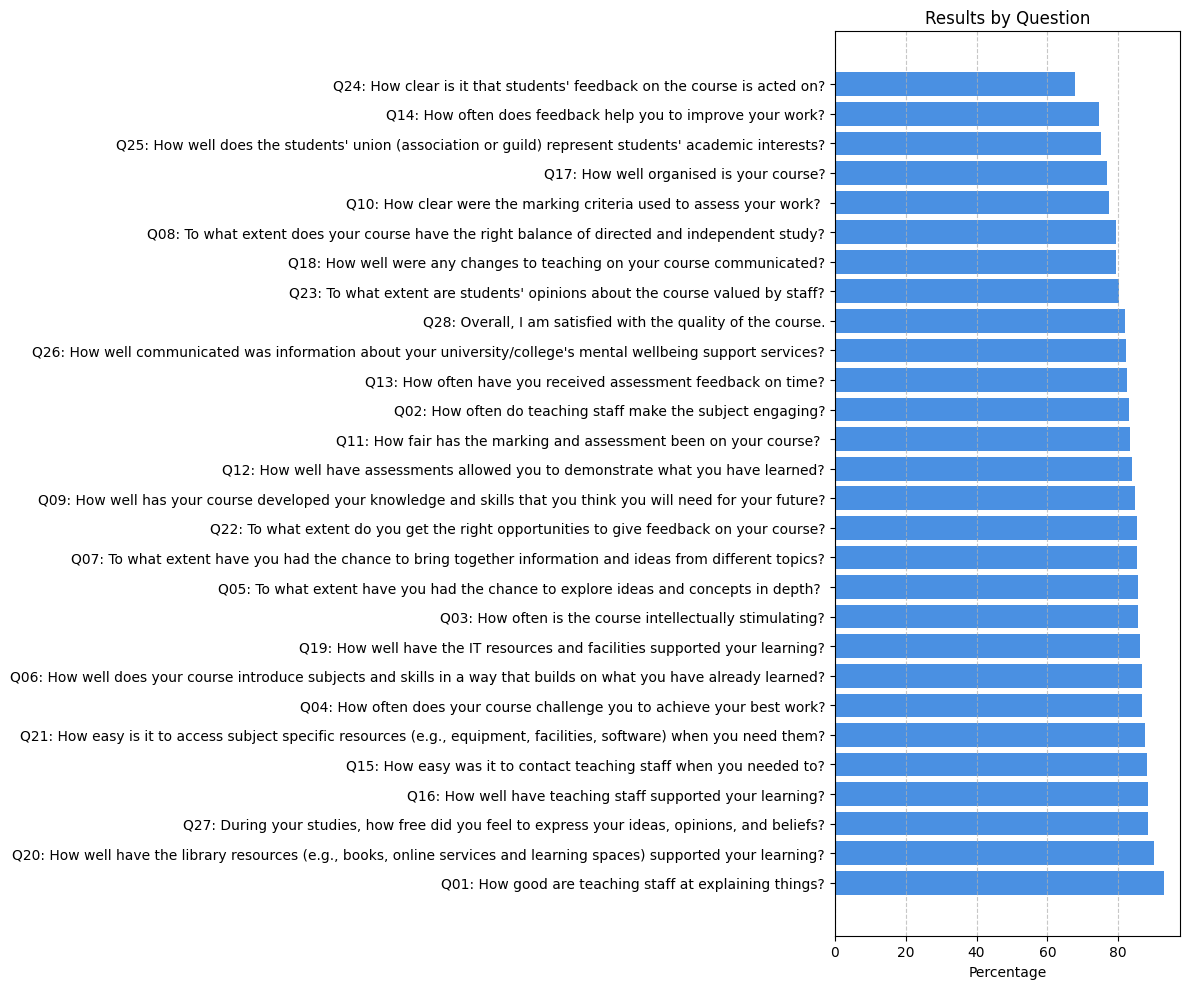

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---
questionToPlot = [] 

answerVaules = []
# Get the list of subjects
totalCha1 = df["cah1_subject"].unique().tolist()

top_10 = (df.groupby('question', as_index=False)
            .agg(mean_agree_pct=('benchmark', 'mean'))
            .sort_values('mean_agree_pct', ascending=True)
)

    # 3. APPEND to the list
for index, row in top_10.iterrows():
    
                    # The subject name
     
        questionToPlot.append(row['question'])              
        answerVaules.append(row['mean_agree_pct'])   



for x in range(len(top_10)):
    print(questionToPlot[x]) 
# -----------------------------

# --- THE PLOTTING CODE (FIXED) ---



fig, ax = plt.subplots(figsize=(12, 10))

# Use barh for horizontal bars
ax.barh(questionToPlot, answerVaules, color='#4a90e2')

ax.set_xlabel("Percentage")
ax.set_title("Results by Question")
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on X axis only
ax.invert_yaxis() # Top question at the top

plt.tight_layout()
plt.show()






In [ ]:
Q03: How often is the course intellectually stimulating?




In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---

total_pop = df['population'].sum()
total_res = df['respondents'].sum()


print((total_res/total_pop)*100)


72.8150541908839


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

# -----------------------------------------
# LOAD DATA
# -----------------------------------------
def load_data(path="nss2025.csv"):
    return pd.read_csv(path)


# -----------------------------------------
# PROCESSING: group, sort, remove last row
# -----------------------------------------
def process_subject_counts(df):
    subject_counts = (
        df.groupby('cah2_subject')['population']
        .sum()
        .reset_index()
        .sort_values('population', ascending=False)
    )
    return subject_counts


# -----------------------------------------
# CHECK IF CURRENT TOTAL <= TARGET
# -----------------------------------------
def reached_target(subject_counts, target):
    current_sum = subject_counts['population'].sum()
    return current_sum <= target


# -----------------------------------------
# REMOVE ROWS UNTIL TARGET REACHED
# -----------------------------------------
def trim_until_target(subject_counts, target):
    # Keep removing last row until <= target
    while True:
        if reached_target(subject_counts, target):
            break
        subject_counts = subject_counts.iloc[:-1]

    return subject_counts


# -----------------------------------------
# MAIN
# -----------------------------------------
df = load_data()

subject_counts = process_subject_counts(df)

total_pop_target = df['population'].sum() *0.5

print("Initial rows:", len(subject_counts))



# Now trim until <= target
subject_counts = trim_until_target(subject_counts, total_pop_target)

print("Final rows:", len(subject_counts))
print(subject_counts)

fig = px.treemap(
        subject_counts, 
        path=[px.Constant(f"Last 25 Subjects ({total_pop_target:,})"), 'cah2_subject'], 
        values='population',                   
        color='cah2_subject',
        
        # Keep the "Pop" colors you liked
        color_discrete_sequence=px.colors.qualitative.Bold,
        hover_data={'population': ':,'}
    )

# Styling: Thin borders, Tight margins, Readable text
fig.update_traces(
    root_color="lightgrey",
    textinfo="label+value+percent parent",
    textfont=dict(size=15, family="Arial Black"),
    marker=dict(line=dict(color='#FFFFFF', width=0.5))
)

fig.update_layout(
    margin=dict(t=30, l=0, r=0, b=0),
    uniformtext=dict(minsize=10, mode='hide')
)

fig.show()






AttributeError: 'numpy.ndarray' object has no attribute 'sort_values'